# Major project by Urjja Banka_sic-20BECE49

# <U> <font color='red'>  Heart Attack Analysis & Prediction

# <font color='green'> 1:Problem formulation

we have used a dataset here that contain some medical information of patients which tells whether that person getting a heart attack chance is less or more.Using the information and by exploring the dataset and classifying  the target variable using Machine Learning models and predicting whether the person is having chances of heart attack or not.

# <font color='green'> 2: Algorithms followed

Here I take two different machine learning algorithm and try to find algorithm which predict accurately.

1)Logistic Regression



2)K-Nearest Neighbour

# <font color='green'> 3:Dataset

heart.csv dataset is used.The dataset contains the following information
    
#### Data contains:

* age - age in years


* sex - (1 = male; 0 = female)


* cp - chest pain type


* trestbps - resting blood pressure (in mm Hg on admission to the hospital)


* chol - serum cholestoral in mg/dl


* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


* restecg - resting electrocardiographic results


* thalach - maximum heart rate achieved


* exang - exercise induced angina (1 = yes; 0 = no)


* oldpeak - ST depression induced by exercise relative to rest


* slope - the slope of the peak exercise ST segment


* ca - number of major vessels (0-3) colored by flourosopy


* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect


* target - have disease or not (1=yes, 0=no)

# Import the liabraries

In [3]:
import numpy as np # for data analysis
import pandas as pd # for mathematical operations on arrays. 
import matplotlib.pyplot as plt # for plotting graphs 
from sklearn.model_selection import train_test_split #for splitting the data 
from sklearn.linear_model import LogisticRegression #for preparing model
from sklearn.metrics import accuracy_score #for accurcay 

# data collection and processing

In [4]:
# loading the csv data to pandas data frame 
heart_dataset=pd.read_csv('heart.csv')

In [5]:
# reading the dataset
heart_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# getting information about the dataset used
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# checking for missing values

In [7]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

we dont find any missing values in this data 

# Analysing the data

# Stastical measure of the data

In [80]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([[163., 140.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  48., 242.,  13.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  12.,  97., 125.,  58.,   7.,   3.,   0.,   1.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  23., 217.,  63.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [303.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  56

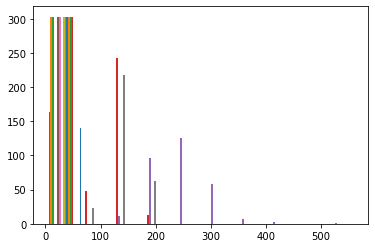

In [81]:
plt.hist(heart_dataset)

In [82]:
# cheaking the distribution of target variable

In [83]:
heart_dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Here 1 represent person has heart disease and 0 represent person has no heart disease .From the above we found that 0 shows 138 people doesnot have any heart disease and 165 people have heart disease

#  To create feature vector(X)and Dependent Variable Vector (Y)

In [84]:
X=heart_dataset.drop(columns='target',axis=1).values
Y=heart_dataset['target'].values

In [85]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

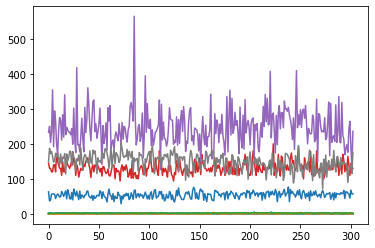

In [86]:
plt.plot(X)

In [87]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

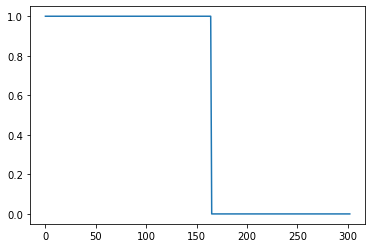

In [88]:
plt.plot(Y)

# Replacing missing data(not required)

because there is no missing data in this dataset(Refer In[7])

# Encoding(not required)

because there is no string value present in the dataset

# spilliting the data into training data and testing data

In [150]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)

In [151]:
Xtrain

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [39.,  0.,  2., ...,  2.,  0.,  2.],
       ...,
       [48.,  1.,  1., ...,  1.,  0.,  2.],
       [65.,  0.,  0., ...,  1.,  3.,  3.],
       [53.,  1.,  0., ...,  1.,  2.,  3.]])

In [152]:
Ytrain

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [153]:
print(X.shape,Y.shape,Xtrain.shape,Xtest.shape,Ytrain.shape,Ytrain.shape )

(303, 13) (303,) (212, 13) (91, 13) (212,) (212,)


# Feature scaling

In [154]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Xtrain=SC.fit_transform(Xtrain)
Xtest=SC.fit_transform(Xtest)

# Build classification model(Logistic Regression)

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [155]:
#step-1 training the classification model
from sklearn.linear_model import LogisticRegression
LoR=LogisticRegression(random_state=0)
LoR.fit(Xtrain,Ytrain)

LogisticRegression(random_state=0)

In [156]:
# step-2:predict the classification model
Yestimate=LoR.predict(Xtest)
print(np.concatenate((Yestimate.reshape(len(Yestimate),1),Ytest.reshape(len(Ytest),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


# performance matrix(Logistic Regression)

confusion matrix:it is a matrix that is used to evaluate the performance of a classification model.
The fundamental of a confusion matrix is the number of correct and incorrect predictiobns which are summed up classwise


In [157]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,Yestimate)
print(cm)

[[34  7]
 [ 3 47]]


In [158]:
from sklearn.metrics import accuracy_score
A=accuracy_score(Ytest,Yestimate)
A

0.8901098901098901

In [159]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm=confusion_matrix(Ytest,Yestimate)
print('Confusion matrix:')
print(cm)
print('\n for Logistic regression')
print('Accuracy Score=',accuracy_score(Ytest,Yestimate))
print('Precision Score=',precision_score(Ytest,Yestimate))

Confusion matrix:
[[34  7]
 [ 3 47]]

 for Logistic regression
Accuracy Score= 0.8901098901098901
Precision Score= 0.8703703703703703


# Build classification Model(KNN Alogorithm)

In [160]:
from sklearn.neighbors import KNeighborsClassifier
KC=KNeighborsClassifier(n_neighbors=18,weights='uniform',p=2)
KC.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=18)

In [161]:
#predict the classification model
Yestimated=KC.predict(Xtest)

# Performance Matrix(KNN Algorithm)

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
cm=confusion_matrix(Ytest,Yestimated)
print('Confusion matrix:')
print(cm)
print('\n for KNN Algorithm')
B=accuracy_score(Ytest,Yestimated)
print('Accuracy Score=',accuracy_score(Ytest,Yestimated))
print('Precision Score=',precision_score(Ytest,Yestimated))

Confusion matrix:
[[34  7]
 [ 5 45]]

 for KNN Algorithm
Accuracy Score= 0.8681318681318682
Precision Score= 0.8653846153846154


In [163]:
error_rate=[]
for i in range(1,30):
    KC=KNeighborsClassifier(n_neighbors=i)
    KC.fit(Xtrain,Ytrain)
    Ypred_i=KC.predict(Xtest)
    error_rate.append(np.mean(Ypred_i!=Ytest))

Text(0, 0.5, 'Error Rate')

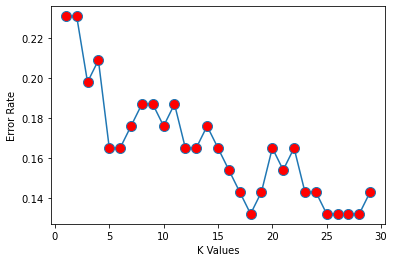

In [164]:
plt.plot(range(1,30),error_rate,marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K Values')
plt.ylabel('Error Rate')

# Model Evaluation

In [165]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                    'K-Nearest Neighbour'], 'Accuracy': [A*100,
                    B*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,89.010989
1,K-Nearest Neighbour,86.813187


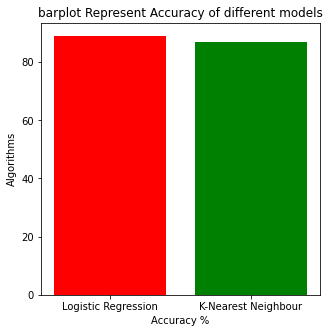

In [166]:
colors = ['red','green',]
plt.figure(figsize=(5,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# <font color='green'> 4:Result

## building a system to predict 

In [167]:
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2) 
# taking from the data set excluding the target to check the target 


In [168]:
# change the input data to a numpy array
newarray=np.asarray(input_data)

In [169]:
# reshape the nuympy array as we are predicting for one instance 
input_data_reshape=newarray.reshape(1,-1)
prediction =LoR.predict(input_data_reshape)
print(prediction)


[0]


In [170]:
if (prediction[0]==0):
    print('the person does not have heart disease')
else:
    print('person has heart disease')

the person does not have heart disease


# <font color='green'>5: Discussion

1) Logistic Regression gives the better Accuracy compared to K-Nearest Neighbour models as we can see from the project that the accuracy percentage of Logistic regression is 89.010989% where as the accuracy percentage of KNN algorithm is 86.813187%.So it is better to use Logistic Regression Model to predict whether the person having a risk of heart attack or not.

# <font color='green'> 6: Reference


Dataset from:https://www.kaggle.com/ronitf/heart-disease-uci


https://www.kaggle.com/nareshbhat/heart-attack-prediction-using-different-ml-models


https://www.geeksforgeeks.org/machine-learning/ 


https://www.geeksforgeeks.org/best-python-libraries-for-machine-learning/    



## submitted by:

    * Urjja Banka
    * sic-20BECE49